### Imports usados

In [303]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import ldl

### Pontos que vamos interpolar e Grau do polinomio

In [304]:
POINTS = np.array([[3, 2], [7, 5], [-5, -1]])
ORDER = 8

### Printa o sistema Aw = b em LaTex

In [305]:
def matriz_para_latex(A, b):
    # Converter a matriz A e o vetor b em uma string de LaTeX
    A_latex = '\\begin{bmatrix}\n'
    for row in A:
        A_latex += ' & '.join(map(str, row)) + ' \\\\\n'
    A_latex += '\\end{bmatrix}'
    
    b_latex = '\\begin{bmatrix}\n' + ' \\\\ '.join(map(str, b)) + ' \n\\end{bmatrix}'
    
    # Criar a matriz coluna de incógnitas w_i
    w_latex = '\\begin{bmatrix}\n'
    w_latex += 'w_0 \\\\ w_1 \\\\ ' + ' \\\\ '.join([f'w_{i+2}' for i in range(len(A[0])-2)]) + ' \n\\end{bmatrix}'
    
    # Montar a equação no formato LaTeX com delimitadores matemáticos
    latex_code = f'\\[\n{A_latex} {w_latex} = {b_latex}\n\\]'
    
    # Imprimir o código LaTeX
    print(latex_code)

### Monta a Matriz A

In [306]:
A = np.zeros((len(POINTS), ORDER + 1))
for i in range(len(POINTS)):
    for j in range(ORDER + 1):
        A[i][j] = POINTS[i][0]**j

b = np.array([point[1] for point in POINTS])
matriz_para_latex(A, b)    

\[
\begin{bmatrix}
1.0 & 3.0 & 9.0 & 27.0 & 81.0 & 243.0 & 729.0 & 2187.0 & 6561.0 \\
1.0 & 7.0 & 49.0 & 343.0 & 2401.0 & 16807.0 & 117649.0 & 823543.0 & 5764801.0 \\
1.0 & -5.0 & 25.0 & -125.0 & 625.0 & -3125.0 & 15625.0 & -78125.0 & 390625.0 \\
\end{bmatrix} \begin{bmatrix}
w_0 \\ w_1 \\ w_2 \\ w_3 \\ w_4 \\ w_5 \\ w_6 \\ w_7 \\ w_8 
\end{bmatrix} = \begin{bmatrix}
2 \\ 5 \\ -1 
\end{bmatrix}
\]


### Plota os dados

In [307]:
def plotar_resultados(x_vals, y_vals_regularizado_1, y_vals_regularizado_2, pontos, lambda_value):
    plt.scatter(pontos[:, 0], pontos[:, 1], color='red', label='Pontos', zorder=5)
    
    plt.plot(x_vals, y_vals_regularizado_1, label=f'Polinômio com regularização (λ = {lambda_value})', color='blue', linewidth=2, linestyle='--')
    
    plt.plot(x_vals, y_vals_regularizado_2, label=f'Polinômio com regularização (λ = {1})', color='green', linewidth=2, linestyle='--')

    plt.xlabel('x')
    plt.ylabel('y')
    plt.legend()
    
    plt.grid(True)
    plt.show()

### Solução com LDL^T

In [308]:
def solver(A, b, lambda_value, ORDER):
    A_ = A.T @ A + lambda_value * np.eye(ORDER + 1) 
    b_ = A.T @ b
    
    # decomposição LDL^T das bibliotecas scypy e numpy
    L, D, perm = ldl(A_)
    z = np.linalg.solve(L, b_)
    y = z / np.diag(D)
    x_regularizado = np.linalg.solve(L.T, y)
    
    return x_regularizado

def calculate_polinomio(x_vals, x_solucao, ORDER):
    y_vals = np.zeros_like(x_vals)
    for i in range(ORDER + 1):
        y_vals += x_solucao[i] * x_vals**i  
    return y_vals

In [309]:
def gradiente_residual(A_, b_, x0, lambda_value, tol=1e-6, max_iter=1000):
    A = A_.T @ A_ + lambda_value * np.eye(ORDER + 1) 
    b = A_.T @ b_

    x = x0
    r = b - np.dot(A, x)
    p = r  
    k = 0

    for _ in range(max_iter):
        alpha_k = np.dot(r.T, r) / np.dot(np.dot(p.T, A), p)
        x = x + alpha_k * p
        r_new = r - alpha_k * np.dot(A, p)
        beta_k = np.dot(r_new.T, r_new) / np.dot(r.T, r)
        p = r_new + beta_k * p
        r = r_new
        k += 1
    
        if np.linalg.norm(r) < tol:
            print(f'Convergiu em {k} iterações')
            break

    return x

[ 1.34505281e-06  3.92951125e-06  1.22044597e-05  3.37475797e-05
  1.10068549e-04  2.47554288e-04  8.86263492e-04  5.31941626e-05
 -2.55881297e-05]
[ 4.12287279e-06  1.20435014e-05  3.74113504e-05  1.03416627e-04
  3.37444617e-04  7.58113782e-04  2.71771853e-03  1.42214668e-04
 -7.72699662e-05]


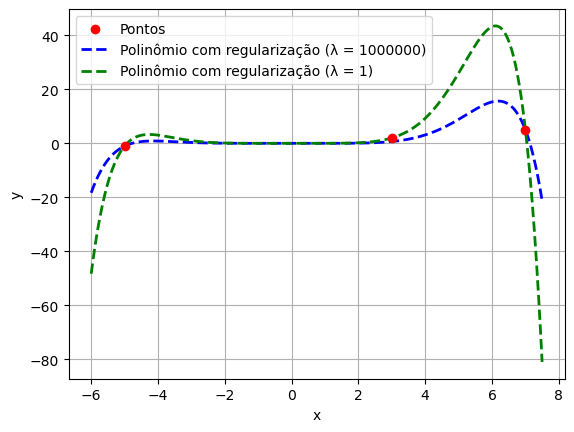

In [310]:
# pontos = ... # Coordenadas dos pontos
lambda_value = 1000000
x_regularizado_1 = solver(A, b, lambda_value, ORDER)
x_regularizado_2 = solver(A, b, 1, ORDER)

print(x_regularizado_1)
print(x_regularizado_2)

# Gerar os valores de x para plotar o polinômio ajustado
x_vals = np.linspace(-6, 7.5, 1000)

# Calcular os valores de y para o polinômio ajustado com regularização
y_vals_regularizado_1 = calculate_polinomio(x_vals, x_regularizado_1, ORDER)
y_vals_regularizado_2 = calculate_polinomio(x_vals, x_regularizado_2, ORDER)

# Plotar os resultados
plotar_resultados(x_vals, y_vals_regularizado_1, y_vals_regularizado_2, POINTS, lambda_value)


Convergiu em 10 iterações
Convergiu em 16 iterações
[ 1.34505282e-06  3.92951113e-06  1.22044614e-05  3.37475746e-05
  1.10068564e-04  2.47554161e-04  8.86263564e-04  5.31941711e-05
 -2.55881320e-05]
[ 1.58324477e-06  3.95525090e-06  1.63759881e-05  2.77898875e-05
  1.80761394e-04  8.55803541e-05  2.92607339e-03  1.75071692e-04
 -8.41852815e-05]


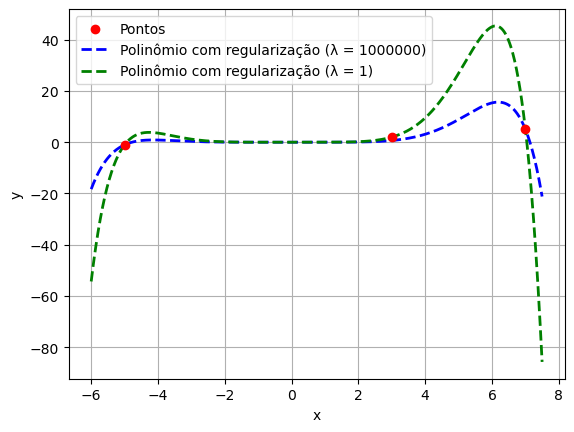

In [311]:
w1 = gradiente_residual(A, b, [0, 1, 2, 3, 4, 5, 6, 7, 8], 1000000)
w2 = gradiente_residual(A, b, [0, 1, 2, 3, 4, 5, 6, 7, 8], 1)

print(w1)
print(w2)

# Calcular os valores de y para o polinômio ajustado com regularização
y1 = calculate_polinomio(x_vals, w1, ORDER)
y2 = calculate_polinomio(x_vals, w2, ORDER)

# Plotar os resultados
plotar_resultados(x_vals, y1, y2, POINTS, lambda_value)
